# Курсовой проект для курса "Теория вероятностей и математическая статистика"

## Тема: "Построение линейной регрессии цен на недвижимость"

# Выполнил - Шульгин С.О.



Подключение библиотек и скриптов

In [148]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


In [149]:
# Загрузка данных — цены на недвижимость в Калифорнии
# Пути к директориям и файлам, загрузка данных
DATA_PATH = r'California_realty.csv'
DATA_PREPARED_PATH = (r'\Shulgin_prepared.csv')
data_path = pd.read_csv(DATA_PATH, sep = ',')


Описание данных датасетов data_train и data_test:

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

In [150]:
# Проверка загрузкой данных
data_path

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [151]:
# На всякий случай делаем копию датасета, чтобы не испортить случайно "эталонные" данные:
X = data_path.copy()
X


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


Анализ представленных в датасетах данных

In [152]:
# Анализируем датасет на предмет корректности типов данных и отсутсвующих данных
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [153]:
# С помощью .describe получим первичное понимание того, что из себя представляют данные
np.set_printoptions(suppress = True)
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [154]:
# Для ускорения расчетов преобразуем типы данных, исходя из их фактических значений
# Для этого вводим подпрограмму
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [155]:
X = reduce_mem_usage(X)


Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [156]:
# Посмотрим на новые типы данных
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

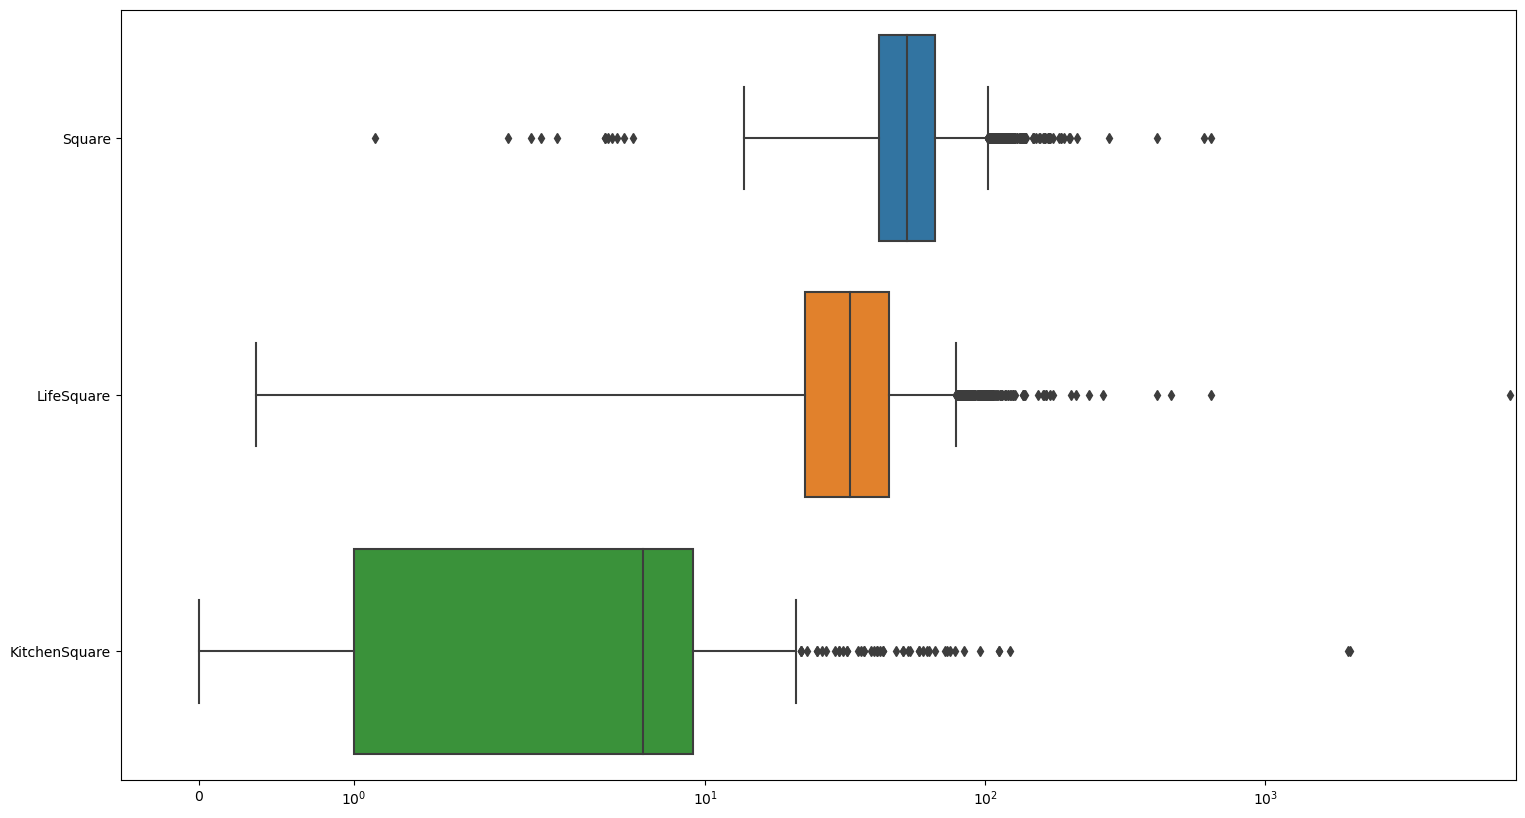

In [157]:
# Уточним для наглядности выбросы по площадям объектов (общая, жилая, кухня), используя логарифмическую шкалу
plt.figure(figsize=(18, 10))
sns.boxplot(data=X[['Square', 'LifeSquare', 'KitchenSquare']], orient='h')
plt.xscale('symlog')
plt.xlim(left=-0.5)
plt.show()

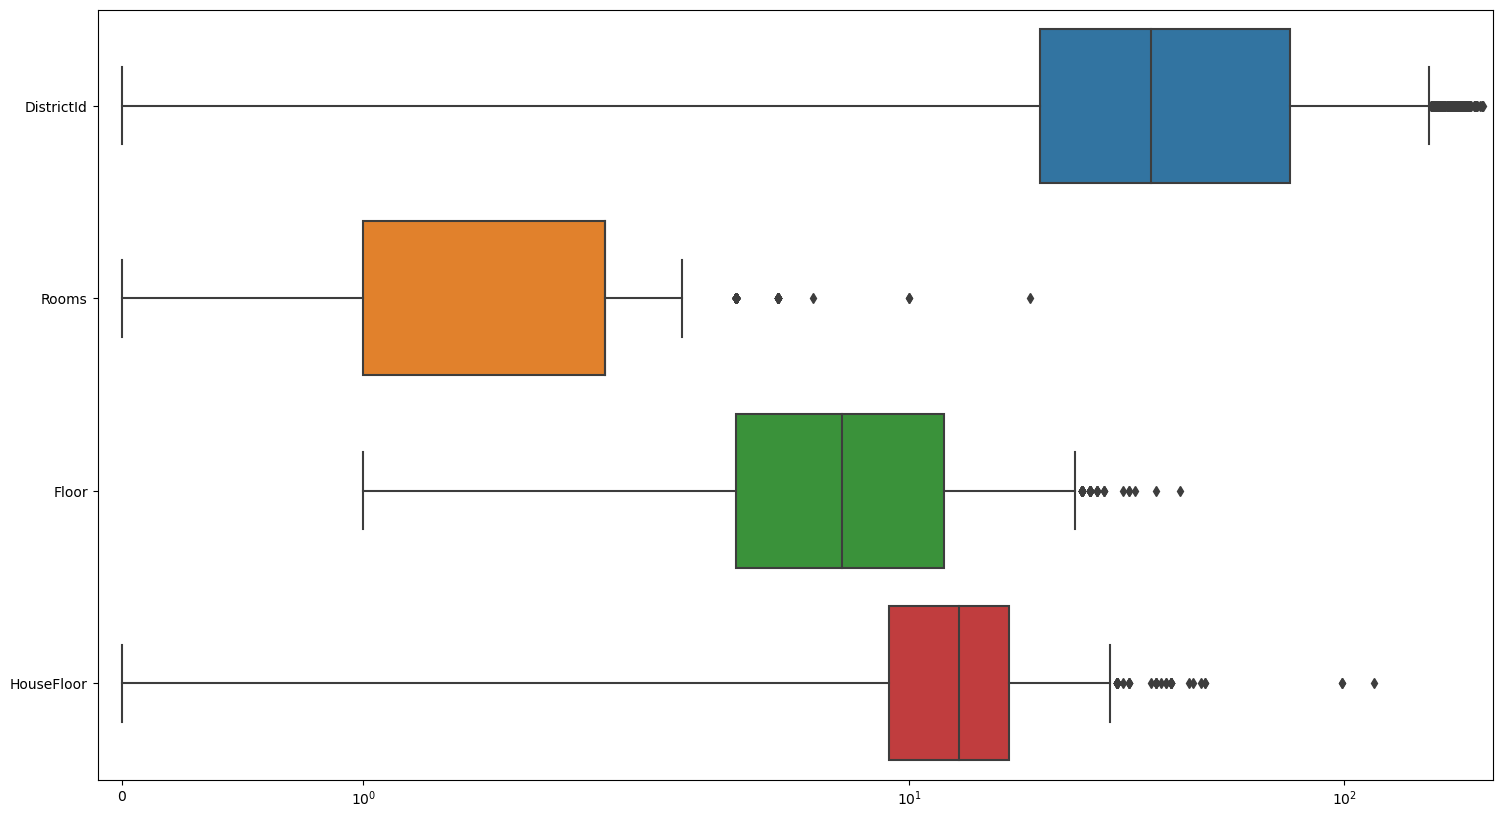

In [158]:
# Уточним для наглядности выбросы по целочисленным значениям
plt.figure(figsize=(18, 10))
sns.boxplot(data=X[['DistrictId', 'Rooms', 'Floor', 'HouseFloor', ]], orient='h')
plt.xscale('symlog')
plt.xlim(left=-0.1)
plt.show()

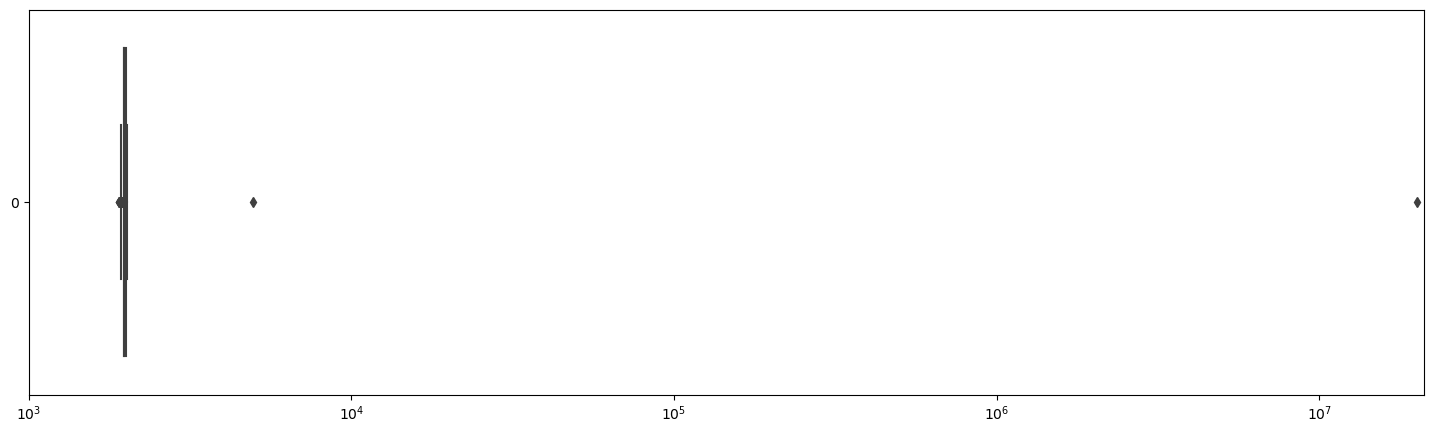

In [159]:
# Уточним для наглядности выбросы по году постройки
plt.figure(figsize=(18, 5))
sns.boxplot(data=X['HouseYear'], orient='h')
plt.xscale('symlog')
plt.xlim(left=1000)
plt.show()

Явно заметно наличие выбросов в количестве комнат, площадях, годах постройки дома.
Helthcare_2 - скорее относится к категориальным признакам.
Показатели местности Social, и Shops интерпретировать трудно.

Вероятно, в данных имеются не только ошибки, но и ОПЕЧАТКИ.

Для уточнения этого момента введем важный параметр для рынка недвижимости - ЦЕНУ КВАДРАТНОГО МЕТРА.

Возможно, это поможет в работе с выбросами. 

In [160]:
# Добавляем важный параметр для рынка недвижимости - ЦЕНУ КВАДРАТНОГО МЕТРА
X.insert(2,'SqMeterPrice', X.Price/X.Square)

In [161]:
# С помощью .describe еще раз посмотрим на данные
np.set_printoptions(precision = 2, suppress = True)
X.describe()

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,3988.375977,1.890500,56.315712,37.199596,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214139.218750
std,4859.01902,43.587592,3755.437744,0.839523,21.058718,86.241112,28.561113,5.241148,6.776192,2.005003e+05,0.119026,17.532614,4006.799803,23.831875,1021.518982,1.493601,4.806341,92872.304688
min,0.00000,0.000000,208.293457,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,2918.525391,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,3910.052246,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,4692.375977,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,230463.531250,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [162]:
# Для удобства создадим функцию для визуальной оценки признакa
def data_estimation (X, col):
    np.set_printoptions(suppress = True)
    print(X[col].value_counts() )
    plt.figure(figsize=(18, 5))
    sns.boxplot(data=X[col], orient='h')
#plt.xscale('symlog')
#plt.xlim(left=1800)
    plt.show()
    X.sort_values(by = col).tail(10)
    plt.show()
#return df 

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64


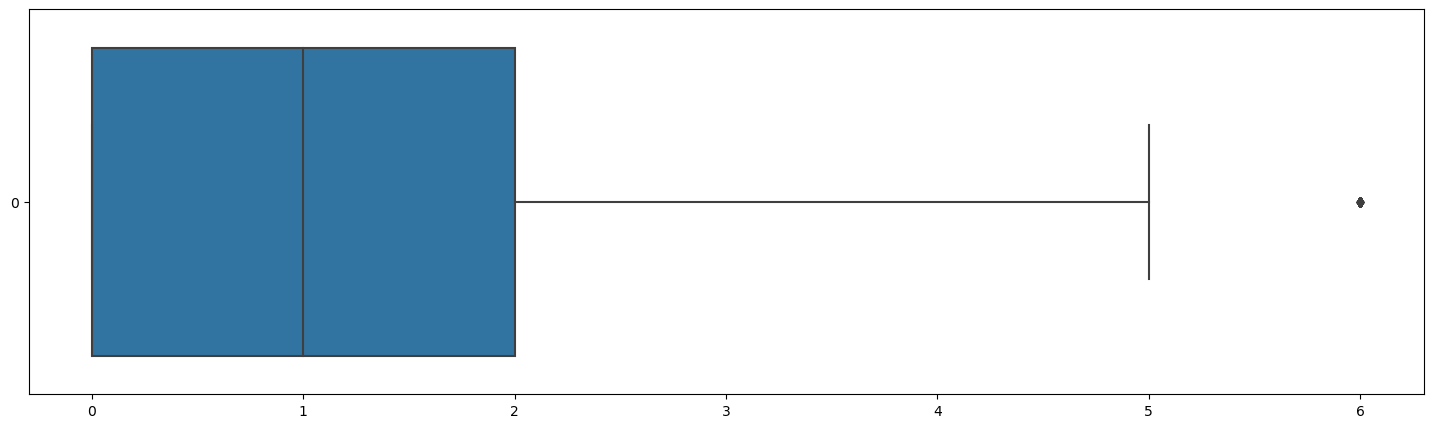

In [163]:
data_estimation(X, 'Helthcare_2')

2710.159424    2
3235.358643    2
3854.958740    1
2675.308838    1
5665.113770    1
              ..
4224.600098    1
4536.111328    1
4382.776855    1
4644.562012    1
5656.401855    1
Name: SqMeterPrice, Length: 9998, dtype: int64


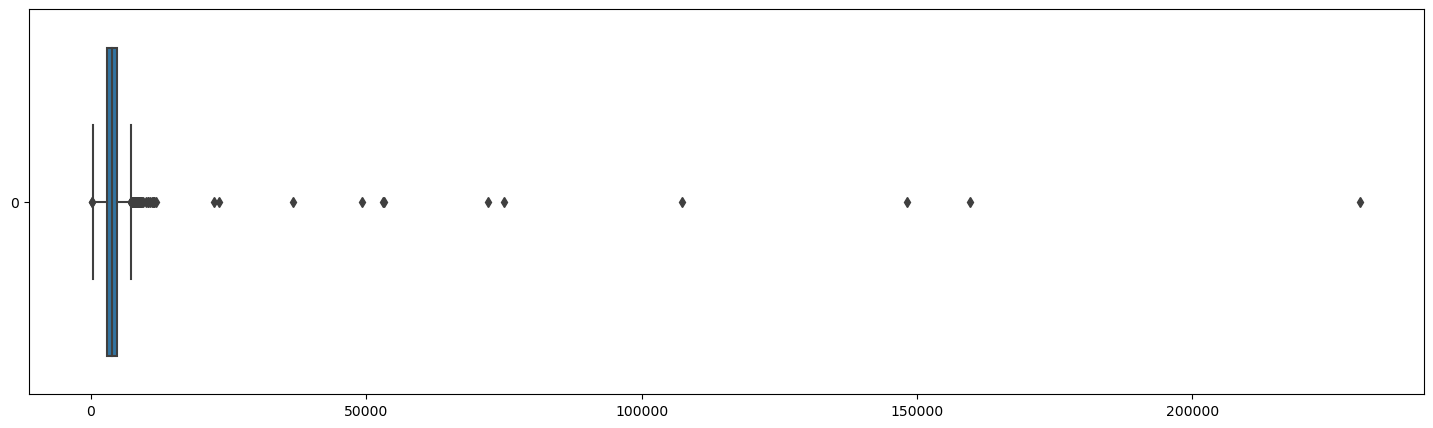

In [164]:
# Уточним для наглядности выбросы по цене квадратного метра
data_estimation(X, 'SqMeterPrice')

Выбросы по цене квадратного метра подтверждают необходимость коррекции данных

ОБЩИЕ НАБЛЮДЕНИЯ И ПРЕДЛОЖЕНИЯ ПО ПРЕДОБРАБОТКЕ ДАННЫХ

Из датасета непонятно, о какой стране идет речь. 
Исходя из того, что на первом вебинере Светлана Медведева говорила о курсовом проекте,
в котором будет предсказание цен на недвижимость в Калифорнии, предположим, что речь идет о США.

Вероятно, в данных имеются не только ошибки, но и ОПЕЧАТКИ.

Датасет явно заполнен не совсем достоверными данными. 
Сомнительно, что существуют жилые помещения площадью до 20 кв. м.

Не знаю американские нормативы, поэтому основываться будем на российские реалии.
Примем, что минимальная площадь квартиры (Square) не должна быть ниже 20 кв. м.
Объекты с площадью ниже 20 кв. м. приравняем к минимальной (20 кв. м.).

Также визуальный анализ данных показал "странные" данные объектов, площадь которых больше 200 кв. м.
У нах аномально низкая цена за кв. м. Заменим их площадь на на медианное значение в датасете.

Двухкомнатные квартиры редко бывают меньше 40 кв.м. Для таких квартир уменьшим количество комнат до одной.

В датафрейме много вариантов, где площадь кухни равна нулю. Это характерно для квартир-студий.
Однако квартира студия может быть только однокомнатной.
Поэтому в случае двух и более комнат нулевое значение площади кухни будем изменять.

Примем минимально возможную площадь кухни 5 кв. м. 
Исключения составляют варианты, где площадь кухни равна 0. Это могут быть квартиры-студии.
Примем максимально возможное отношение площади кухни к общей площади квартиры 0.3 (Кк = 0.3)
Кухни с площадью меньше минимально возможной в однокомнатных квартирах приравняем к минимально возможной.
В квартирах с Кк большим 0.3 площадь кухни приравняем к медианному значению площедей кухонь датасета.

При этом жилая площадь квартиры должна быть меньше общей площади хотя бы на 3 кв. м.
Предположим, что это минимальная площадь санузла и коридора. 

Графа с жилой площадью (LifeSquare)  содержит много пустых значений.
Примем коэффициент 0.65 максимального соотношения жилой площади к общей площади (Кж = 0.65). 
Примем минимальную площадь вспомогательных помещений равную 3 кв. м. (санузел и коридор).
Для жилой площади, если она меньше половины от площади, приравниваем ее к Кж.
Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до возможного максимума (Кж).

Количество комнат в среднем составляет от 1 до 5. Есть несколько объектов с количеством комнат
от 6 до 19. У них очень маленький метраж для такого количества комнат и таких объектов всего 4.
Поэтому приведем количество комнат в них к медианному значению.

Примем нормативный коэффициент отношения жилой площади к общей равной 0.65. 
Для жилой площади, если она меньше половины общей площади, то приравниваем ее к нормативному коэффициенту
Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до максимума
    
Минимальный этаж (Floor) расположения квартиры - нулевой, максимальный -42. 

По критерию "этажность дома" (HouseFloor) проходят три квартиры в домах общей этажностью 117 и 99 этажей соответственно.
В США вообще нет ЖИЛЫХ зданий с 117 и 99 этажами. Также для таких "небоскребов" характерна очень высокая стоимость квартир.
В представленном датасете она не сильно отличается от средней. Поэтому приведем этажность дома к медианному значению.

Очень много строк (1210) с ситуацией, когда этажность дома НИЖЕ этажа расположения квартиры.
Примем в данном случае, что  этаж расположения квартиры равен этажности дома.

Год постройки дома в целом по датасету введен корректно. Исключения составляют только 2 объекта с годами больше 2022.
При этом у одного объекта год стоит как 20052011, что, вероятно, говорит о явной ошибке ввода даты вместо года. Учитывая американский формат ввода дат (месяц–день–год), предположим что это был 2011 г. Второй объект с годом "4968" просто исключим.

Признак "Ecology_1" непонятно что обозначает, но распределен особо без выбросов. 
Приведем выбросы к медианному значению.

Признаки 'Ecology_2' и 'Ecology_3' имеют значения только А, В. Будем их рассматривать как категориальные признаки.
То же относится и к признаку 'Shops_2'

Признак 'Social_1' непонятно что обозначает, но распределен без выбросов. 
Оставляем без изменений.

Признак "Social_2" непонятно что обозначает, но распределен особо без выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Признак "Social_3" непонятно что обозначает, но имеет довольно много выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Признак 'Healthcare_1' непонятен и содержит очень много пропущенных значений. 
Откажемся от учета этого признака в процессе анализа.

Признак "Shops_1" непонятно что обозначает, но распределен особо без выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Признак 'Helthcare_2' непонятно что обозначает, но распределен особо без выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Идентификатор объекта Id не несет никакой информации для целей машинного обучения. Поэтому пока его удаляем.


На основании вышеизложенных положений и доводов создадим подпрограмму коррекции данных
исходного датасета "data_correction"

In [165]:
# ПОДПРОГРАММА ПРЕДОБРАБОТКИ ДАННЫХ
# создана на основании пункта "ОБЩИЕ НАБЛЮДЕНИЯ И ПРЕДЛОЖЕНИЯ ПО ПРЕДОБРАБОТКЕ ДАННЫХ"
def data_correction(X):
    # Создадим категориальные признаки из значений 'Ecology_2', 'Ecology_3' и 'Shops_2'
    X['Ecology_2'] = X['Ecology_2'].map({'A':1, 'B':2})
    X['Ecology_3'] = X['Ecology_3'].map({'A':1, 'B':2})
    X['Shops_2'] = X['Shops_2'].map({'A':1, 'B':2})

    # Откажемся от учета признака 'Healthcare_1' в процессе анализа
    X = X.drop(columns='Healthcare_1') 
    
    # Идентификатор объекта Id не несет никакой информации для целей машинного обучения. Поэтому пока его удаляем.
    X = X.drop(['Id'], axis = 1)
    
    # Объекты с площадью ниже 20 кв. м. приравняем к минимальной площади - 20 кв. м.
    X.loc[(X['Square'] < 20), 'Square'] = 20
    
    # Объекты с площадью выше 200 кв. м. заменим на медианное значение
    X.loc[(X['Square'] > 200) , 'Square'] = X['Square'].median()
           
     # Количество комнат больше 5 заменим на медианное значение
    X.loc[(X['Rooms'] > 5) , 'Rooms'] = X['Rooms'].median()
        
    # Для квартир площадью меньше 40 кв. м. уменьшим количество комнат до одной
    X.loc[(X['Square'] <= 40), 'Rooms'] = 1
    
    # Кухни с площадью меньше минимально возможной в однокомнатных квартирах приравняем к минимально возможной.
    # Исключения составляют варианты, где площадь кухни равна 0. Это могут быть квартиры-студии.
    
    X.loc[((X['KitchenSquare'] <= 5) & (X['Rooms'] == 1) & (X['KitchenSquare'] != 0) ) , 'KitchenSquare'] = 5
    
    # В квартирах с Кк большим 0.4 площадь кухни приравняем к медианному значению
    X.loc[((X['KitchenSquare'] < 5) | (X['KitchenSquare'] > 0.4 * X['Square'])), 'KitchenSquare'] = X['KitchenSquare'].median()
    
    # Для жилой площади, если она меньше половины от площади, приравниваем ее к Кж.
    X.loc[X['LifeSquare'] < (0.5 * X['Square']), 'LifeSquare'] = X['Square'] * 0.65
    X.loc[X['LifeSquare'].isnull(), 'LifeSquare'] = X['Square'] * 0.65
           
    # Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до возможного максимума (Кж).       
    X.loc[(X['LifeSquare'] > (X['Square'] - X['KitchenSquare'] - 3)), 'LifeSquare'] = (X['Square'] - X['KitchenSquare'] - 3)  
    # df.loc[(df['LifeSquare'] < MIN_LIFE), 'LifeSquare'] = MIN_LIFE
    
    # Объекты на этажах выше 99 приравняем к медианному значению
    X.loc[X['HouseFloor'] >= 99, 'HouseFloor'] = X['HouseFloor'].median()
            
    # Если этажность дома НИЖЕ этажа расположения квартиры принимаем, что этажность дома равна этажу расположения квартиры 
    X.loc[(X['Floor'] > X['HouseFloor']), 'Floor'] = X['Floor']
    
    # Год постройки дома в целом по датасету введен корректно. Исключения составляют только 2 объекта с годами больше 2022. 
    # При этом у одного объекта год стоит как 20052011, что, вероятно, говорит о явной ошибке ввода даты вместо года. 
    #Учитывая американский формат ввода дат (месяц–день–год), предположим что это был 2011 г. 
    # Второй объект с годом "4968" приравняем к медианному значению.
    X.loc[(X['HouseYear'] == 20052011), 'HouseYear'] = 2011
    X.loc[(X['HouseYear'] > 2022), 'HouseYear'] = X['HouseYear'].median()
    
    return X

In [166]:
# Подготавливаем данные с помощью data_correction()
X = data_correction(X)


In [167]:
# Проверяем полученные данные
X.sort_values('Square')

,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
3413,5,72032.843750,1.0,20.000000,12.000000,5.0,1,1.0,1977,0.150818,2,2,16,3433,4,4,5,2,369472.406250
4739,81,5686.584961,1.0,20.000000,10.000000,7.0,4,5.0,1960,0.319809,2,2,25,4756,16,5,8,2,78388.804688
4853,27,53253.582031,1.0,20.000000,11.000000,6.0,1,0.0,1977,0.017647,2,2,2,469,0,0,0,2,126596.945312
212,88,75042.117188,1.0,20.000000,12.000000,5.0,24,22.0,1977,0.127376,2,2,43,8429,3,3,9,2,412511.093750
3794,101,6258.833984,1.0,20.000000,12.000000,5.0,5,5.0,1970,0.225825,1,2,41,6558,7,3,2,2,115845.859375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,13,3396.668457,5.0,183.382278,100.985504,15.0,2,6.0,1997,0.090799,2,2,74,19083,2,5,15,2,622888.812500
5087,129,1830.347168,4.0,185.906403,120.839157,31.0,5,3.0,2015,0.020741,2,2,24,5613,5,2,5,2,340273.250000
7201,129,2268.132080,4.0,186.692596,121.350182,32.0,3,3.0,2011,0.020741,2,2,24,5613,5,2,5,2,423443.468750
652,56,1774.327637,3.0,190.857681,107.376167,19.0,7,3.0,2007,0.000000,2,2,23,5067,4,2,6,2,338644.062500


In [168]:
# Проверяем отсутствие пропусков
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DistrictId     10000 non-null  int16   
 1   SqMeterPrice   10000 non-null  float32 
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Helthcare_2    10000 non-null  int8    
 16  Shops_1        10000 non-null  int8    
 17  Shops_2        10000 non-null  c

20.000000     21
52.513309      6
81.867165      2
80.794792      2
44.482914      2
              ..
104.745209     1
55.278957      1
44.256939      1
38.239483      1
38.666645      1
Name: Square, Length: 9970, dtype: int64


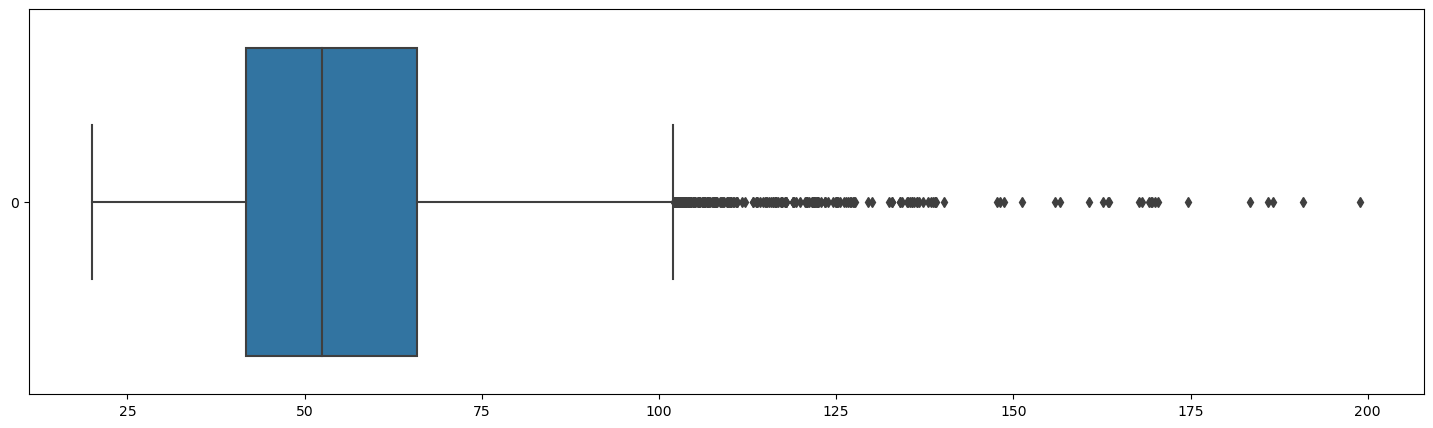

In [169]:
# Посмотрим еще раз на выбросы:
data_estimation(X, 'Square')

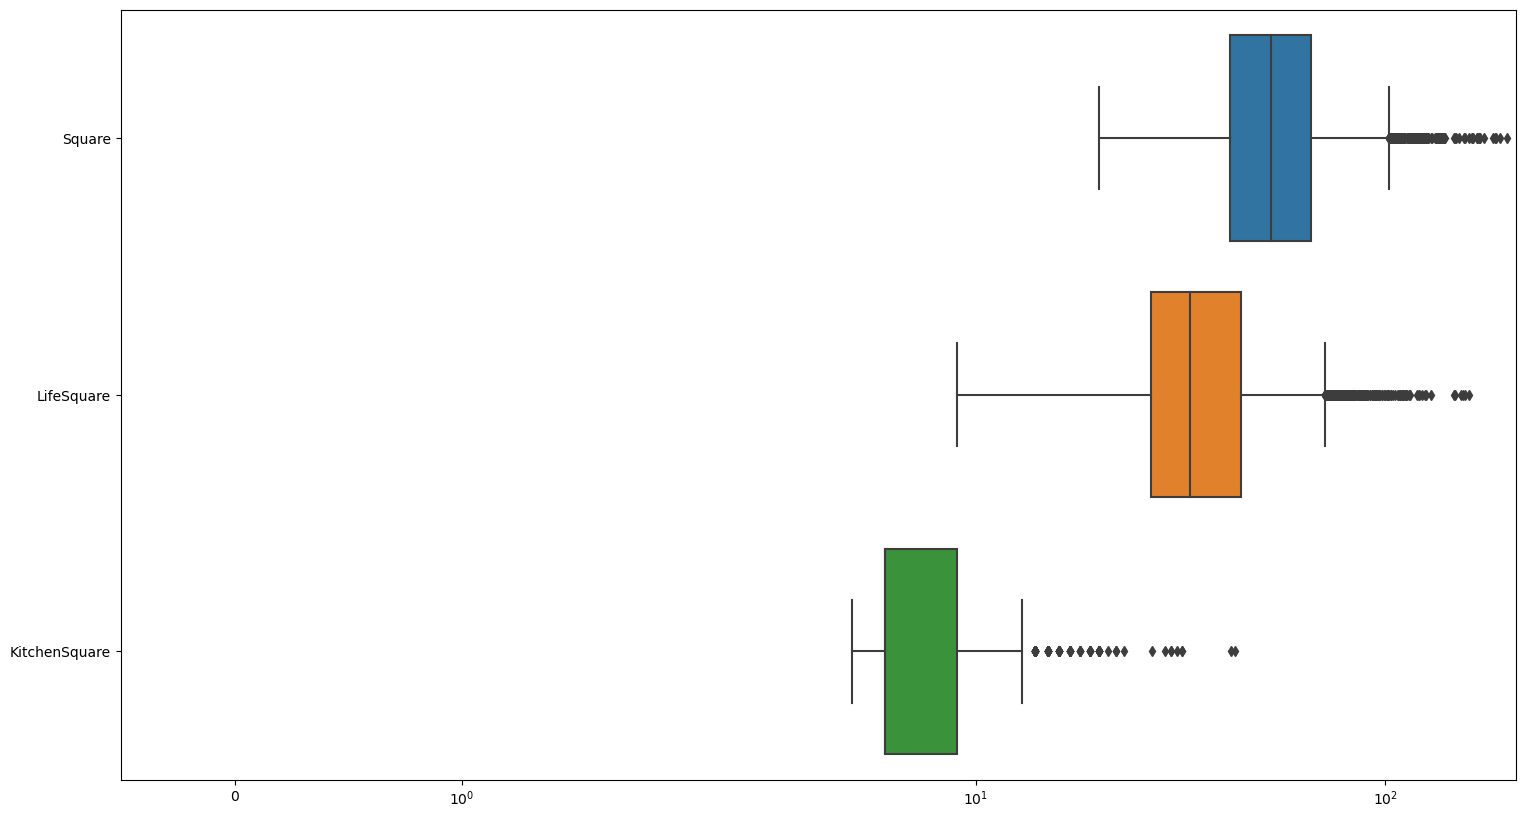

In [170]:
# Уточним для наглядности выбросы по площадям объектов (общая, жилая, кухня), используя логарифмическую шкалу
plt.figure(figsize=(18, 10))
sns.boxplot(data=X[['Square', 'LifeSquare', 'KitchenSquare']], orient='h')
plt.xscale('symlog')
plt.xlim(left=-0.5)
plt.show()

Ситуация улучшилась

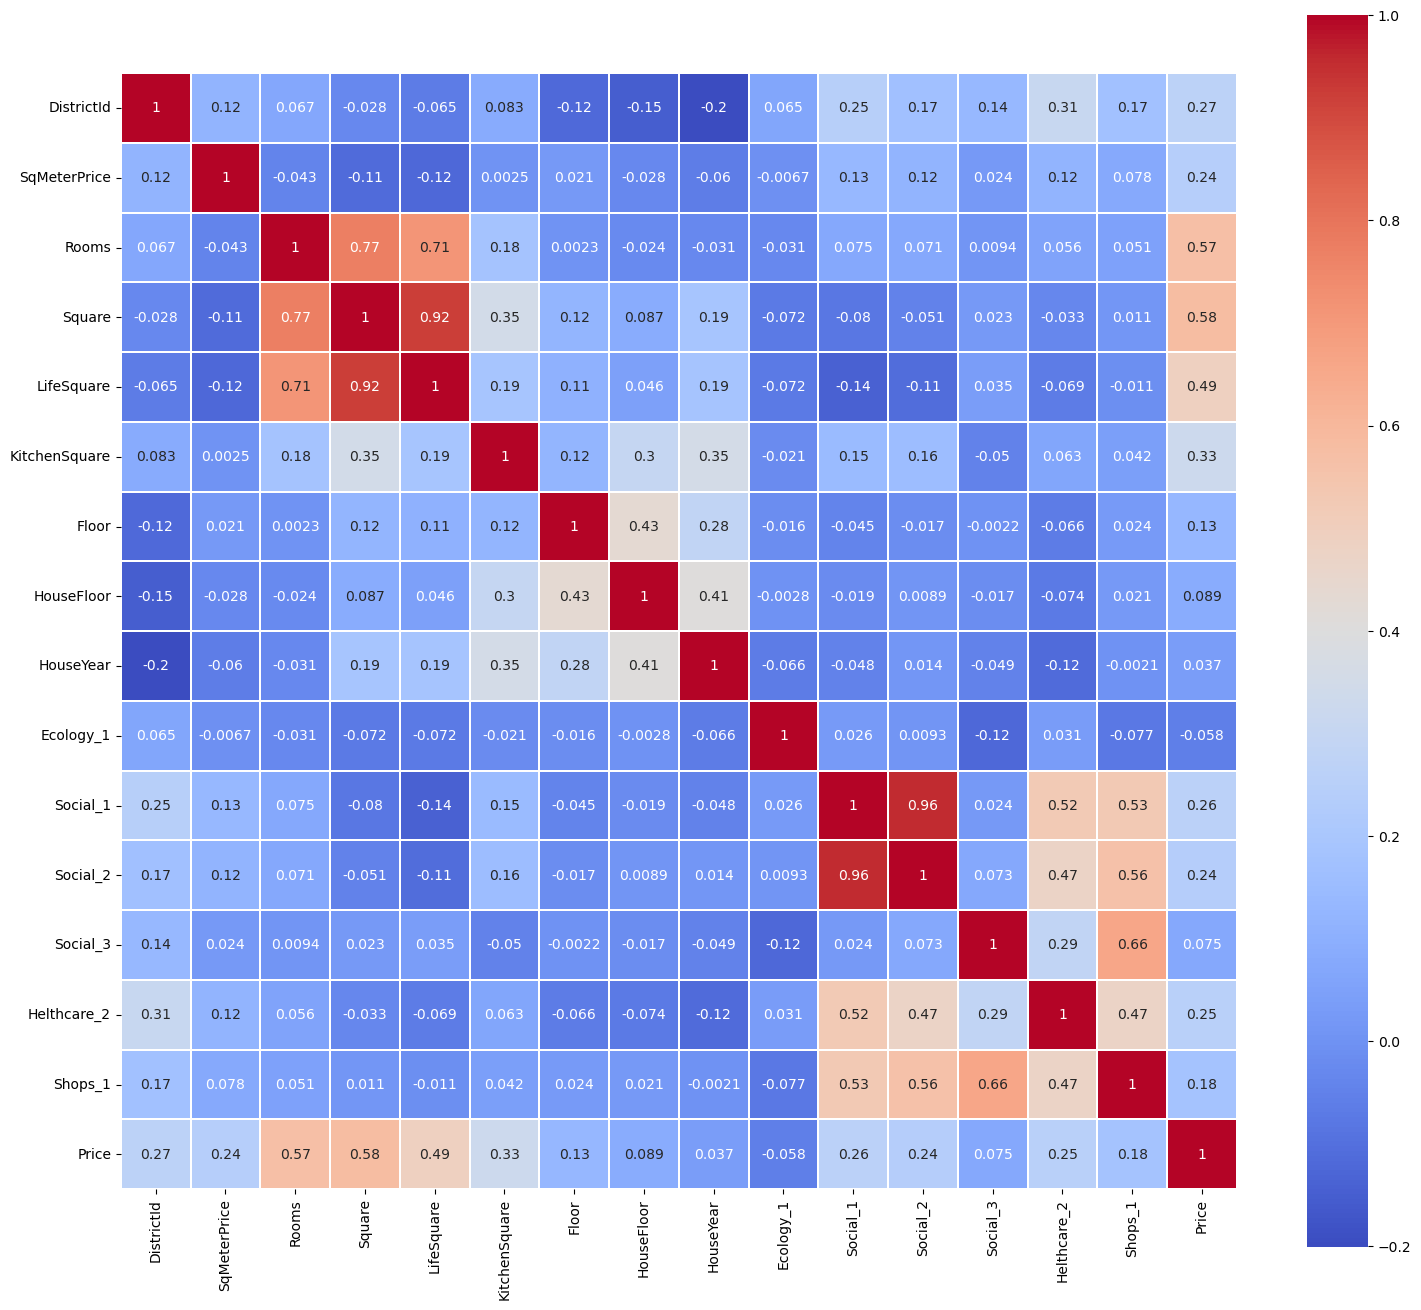

In [171]:
# Посмотрим на корреляцию признаков в датасете
X_corr=X.corr()
plt.figure(figsize=(18,16))
sns.heatmap(X_corr, annot=True, linewidths=0.3, cmap='coolwarm', square=True)
plt.show()

<AxesSubplot:>

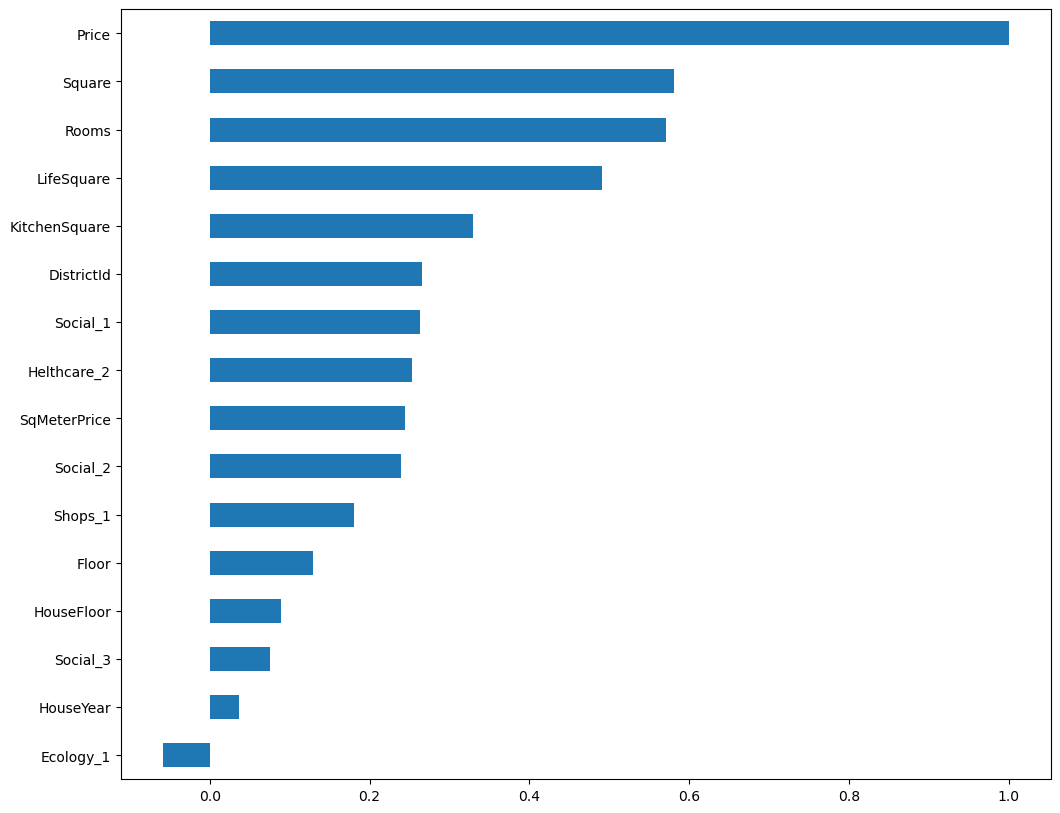

In [172]:
# Для большей наглядности построим диаграмму корреляции признаков в датасете
plt.figure(figsize = (12,10))
X.corr()['Price'].sort_values(ascending=True).plot(kind='barh')

**Видим, что больше всего целевая переменная зависит от общей площади объекта.
На этом основании будем строить линейную регрессию общей цены объекта от его площади**

Подготовка модели

In [173]:
# Отделяем от датафрейма все переменные, кроме цены (Price)
# и площади (Sq
X=X[['Price', 'Square']]

X.shape,  X


((10000, 2),
               Price     Square
 0     184966.937500  47.981560
 1     300009.437500  65.683640
 2     220925.906250  44.947952
 3     175616.234375  53.352982
 4     150226.531250  39.649193
 ...             ...        ...
 9995  196684.312500  50.401787
 9996  189050.296875  41.521545
 9997  159143.812500  47.939007
 9998  181595.343750  43.602562
 9999  218714.078125  38.666645
 
 [10000 rows x 2 columns])

Text(0, 0.5, 'Цена объекта, долл.')

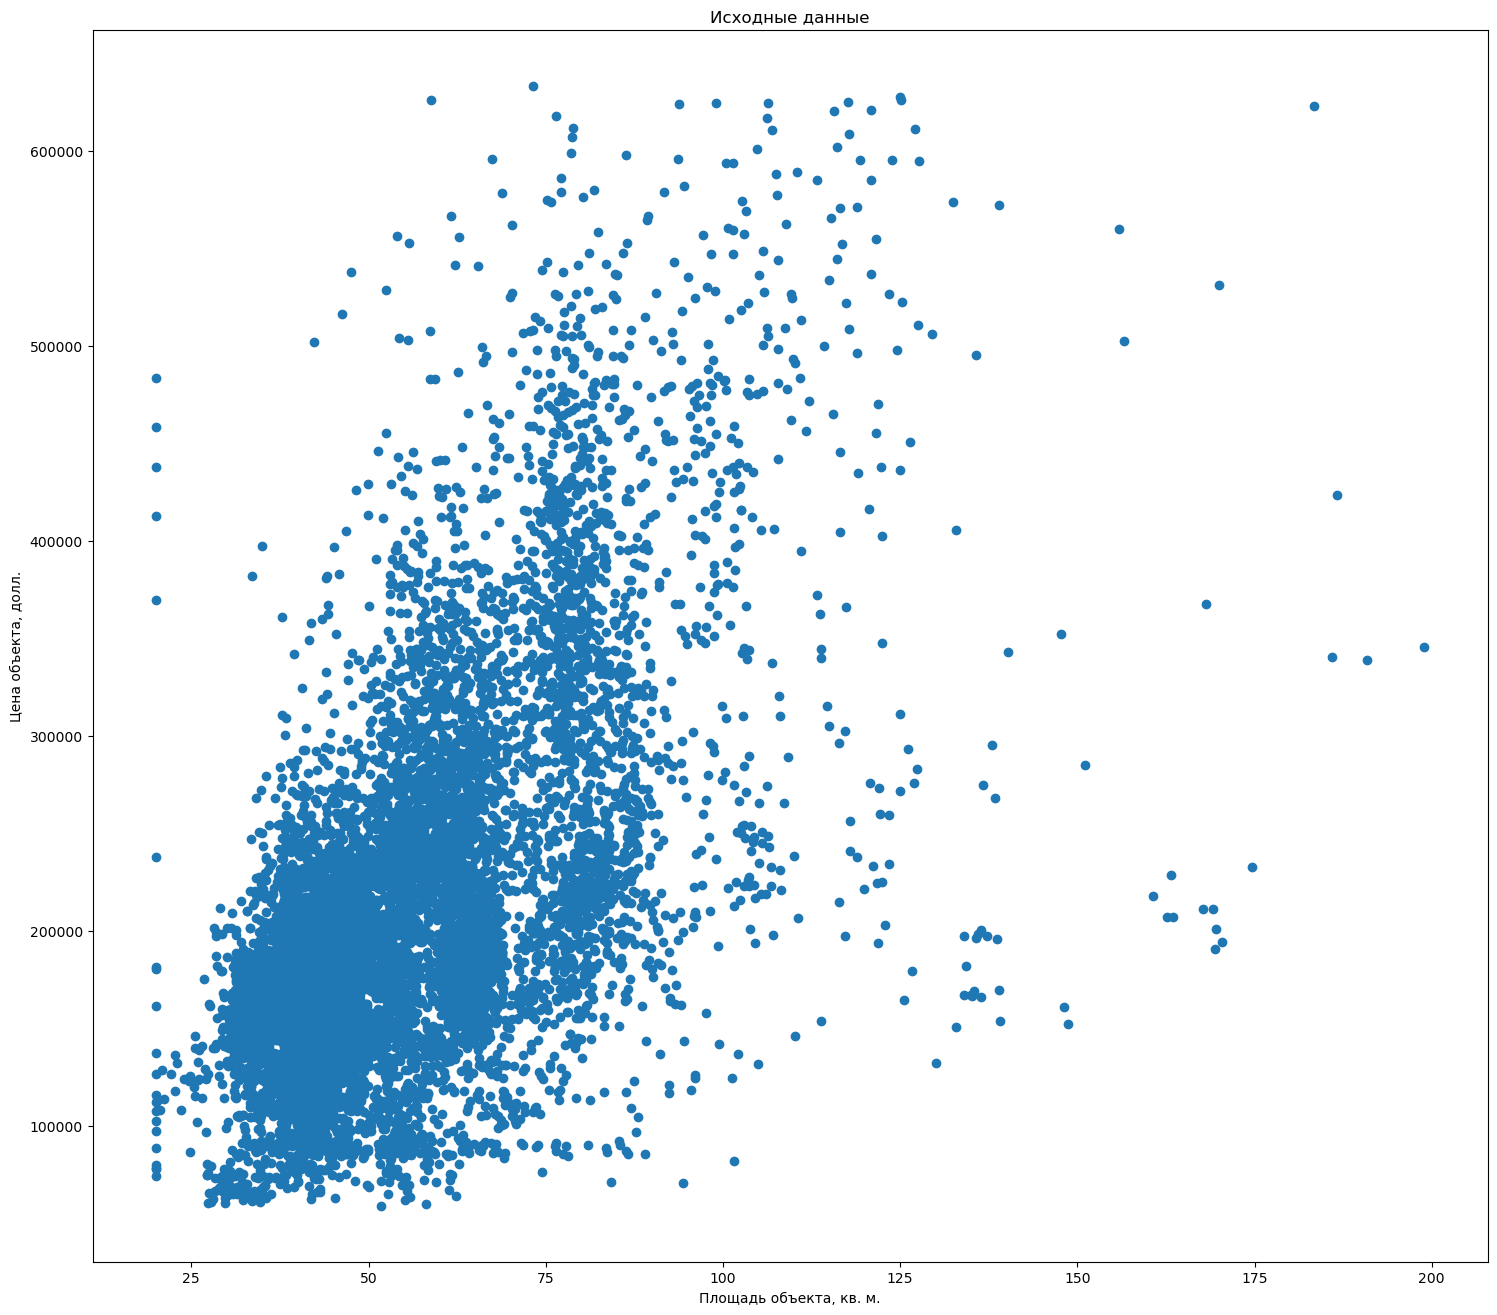

In [174]:
# Посмотрим на исходные данные на графике:
#plt.xlim([20,220])
#plt.ylim([1000000,800000])
plt.figure(figsize=(18,16))
plt.scatter(X.Square, X.Price)
#grid on
plt.title('Исходные данные')
plt.xlabel('Площадь объекта, кв. м.')
plt.ylabel('Цена объекта, долл.')

**Из беглого анализа графика можно сделать вывод, что линейная зависимость проглядывается.**

Рассмотрим связь между одной причиной  𝑥  и следствием  𝑦 , то есть парную регрессию. Исходными данными являются  𝑛  значений

фактора  𝑥  и соответствующие значения результативной величины  𝑦 . Считаем, что связь между  𝑥  и  𝑦  описывается линейной

функцией:

$$y = a + bx$$


В нашем случае в качестве x выступает площадь объекта, а в качестве у - цена объекта.

In [175]:
x = X.Square
y = X.Price

In [176]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2861.338370173982

In [177]:
a = np.mean(y) - b*np.mean(x)
a

53518.58356048641

Итак, уравнение регрессии имеет вид (коэффициенты округлены до целых):
$$y = a + bx$$
$$y = 53519 + 2861\cdot x$$

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:
$$r_{xy} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2 \cdot {\sum\limits_{i=1}^{n} (y_i - \overline{y})^2}}} = b \cdot {\frac{\sigma_x}{\sigma_y}}$$

In [178]:
r = b * np.std(x) / np.std(y)
r

0.5808511263457624

Найдем коэффициент детерминации $R^2$:


In [179]:
R2 = r**2
R2

0.3373880309771409

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения цен на квартиры:

In [180]:
y_pred = a + b*x
X['Predict Price'] = y_pred
np.set_printoptions(suppress = True)
X

,Price,Square,Predict Price
0,184966.937500,47.981560,190810.062500
1,300009.437500,65.683640,241461.703125
2,220925.906250,44.947952,182129.890625
3,175616.234375,53.352982,206179.515625
4,150226.531250,39.649193,166968.343750
...,...,...,...
9995,196684.312500,50.401787,197735.140625
9996,189050.296875,41.521545,172325.781250
9997,159143.812500,47.939007,190688.296875
9998,181595.343750,43.602562,178280.265625


Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [181]:
# Общее число строк в массиве:
n = len(X.axes[0])
n

10000

In [182]:
A = (np.mean(abs(y - y_pred)/y)/n)*100
A

0.002971578240394592

Так как $\overline {A}$ равна 0.003%, что не превышает 8-10 %, модель хорошо описывает эмпирические данные. Для оценки значимости 

уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [183]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

5090.770603923522

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 10000 - 2 = 9998$ табличное значение критерия: $F_{кр} = 3.84$.

Так как $F_{факт} = 5090.7 > F_{кр} = 3.84$, уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 10000 - 2 = 9998$ и $\alpha = 0.05$ получим

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):
$$t_{кр} = 1,967$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [184]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 75601.98432511397
m_a = 2374.714948487388
m_b = 40.10264850667872


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [185]:
t_a = a / m_a
t_a

22.536845356776784

In [186]:
t_b = b / m_b
t_b

71.35035905913928

Фактические значения t-статистики больше табличного значения:
    $$t_a = 22.53 > t_{кр} = 1.967, \; t_b = 71.35 > t_{кр} = 1.967,$$
    
поэтому параметры $a$ и $b$ не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. 

Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$),

используя значение $t_{кр}$, равное 1.967 (переменная **t_cr**):

In [187]:
t_cr = 1.967

In [188]:
delta_a = t_cr * m_a
delta_a

4671.064303674692

In [189]:
delta_b = t_cr * m_b
delta_b

78.88190961263705

$$y = a + bx$$
$$y = 53519 + 2861\cdot x$$
Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [190]:
gamma_a_min = a - delta_a
gamma_a_min

48847.51925681172

In [191]:
gamma_a_max = a + delta_a
gamma_a_max

58189.6478641611

In [192]:
gamma_b_min = b - delta_b
gamma_b_min

2782.456460561345

In [193]:
gamma_b_max = b + delta_b
gamma_b_max

2940.2202797866194

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, 

являются статистически значимыми и отличны от нуля. 

In [194]:
# Отсортируем значения по полю Square:

In [195]:
X = X.sort_values('Square')
X

,Price,Square,Predict Price
3413,369472.406250,20.000000,110745.34375
4739,78388.804688,20.000000,110745.34375
4853,126596.945312,20.000000,110745.34375
212,412511.093750,20.000000,110745.34375
3794,115845.859375,20.000000,110745.34375
...,...,...,...
4487,622888.812500,183.382278,578237.31250
5087,340273.250000,185.906403,585459.68750
7201,423443.468750,186.692596,587709.25000
652,338644.062500,190.857681,599627.00000


**Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:**

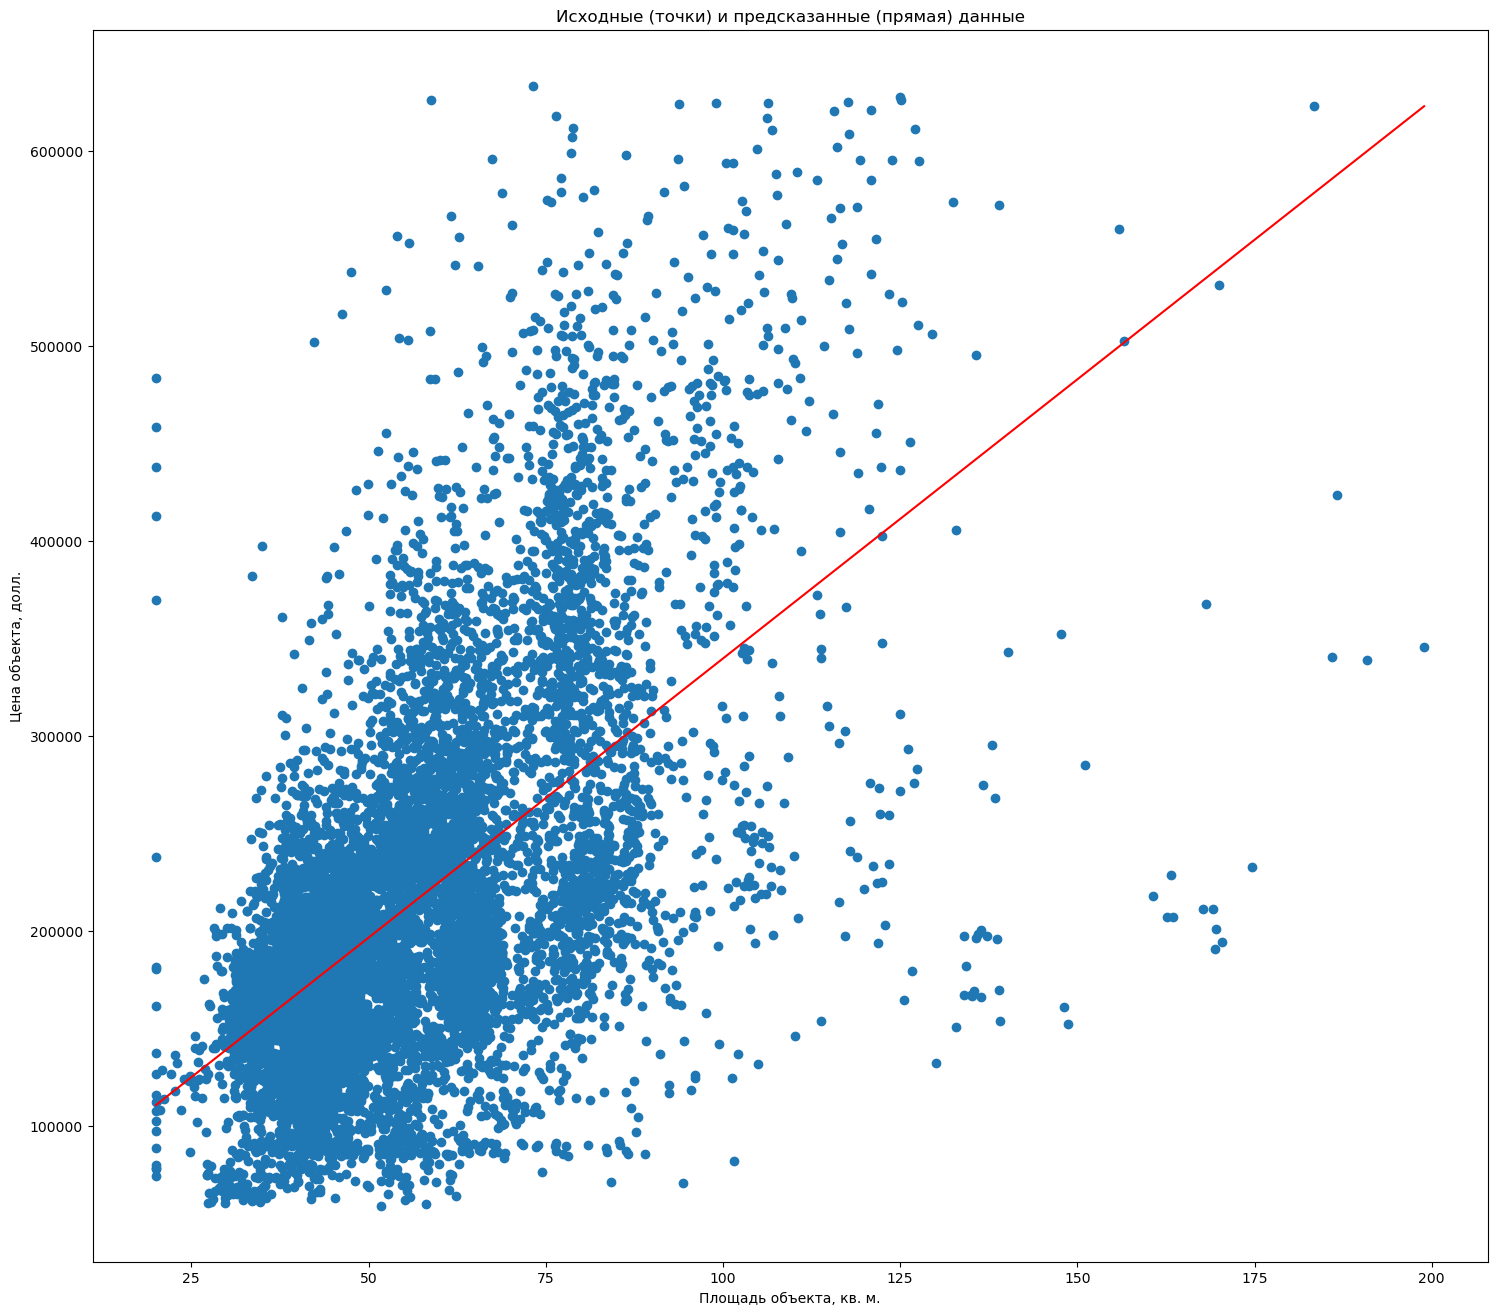

In [196]:
plt.figure(figsize=(18,16))
plt.scatter(X['Square'], X['Price'])
plt.plot(X['Square'], X['Predict Price'], c = 'Red')
plt.title('Исходные (точки) и предсказанные (прямая) данные')
plt.xlabel('Площадь объекта, кв. м.')
plt.ylabel('Цена объекта, долл.')
plt.show()

### Проверка матричным методом:

Так же коэффициенты $a, b$  линейной регрессии можно расчитать с помощью матричного метода используя формулу:
$$
\begin{pmatrix}
y_{1} \\ 
y_{2} \\  
y_{3} \\  
\cdots \\ 
y_{n} \\  
\end{pmatrix} = \begin{pmatrix}
1 & x_{1} \\ 
1 & x_{2} \\  
1 & x_{3} \\  
\cdots & \cdots \\ 
1 & x_{n} \\  
\end{pmatrix} * \begin{pmatrix}
a\\ 
b\\  
\end{pmatrix}$$


Тогда вектор коэффициентов линейной регрессии $\begin{pmatrix}
a\\ 
b\\  
\end{pmatrix}$
  находится по общей формуле:
  $$B = (X^{T}\cdot X)^{-1}\cdot X^{T} \cdot Y$$

In [204]:
xx = X.Square.to_numpy ()
yy = X.Price.to_numpy ()
xx, yy

(array([ 20.  ,  20.  ,  20.  , ..., 186.69, 190.86, 198.93], dtype=float32),
 array([369472.4 ,  78388.8 , 126596.95, ..., 423443.47, 338644.06,
        345665.22], dtype=float32))

In [207]:
yy=yy.reshape((-1,1))
yy

array([[369472.4 ],
       [ 78388.8 ],
       [126596.95],
       ...,
       [423443.47],
       [338644.06],
       [345665.22]], dtype=float32)

In [206]:
xx=xx.reshape((-1,1))
xx=np.hstack([np.ones((len(xx),1)),xx])
xx

array([[  1.  ,  20.  ],
       [  1.  ,  20.  ],
       [  1.  ,  20.  ],
       ...,
       [  1.  , 186.69],
       [  1.  , 190.86],
       [  1.  , 198.93]])

In [208]:
B=np.dot(np.linalg.inv(np.dot(xx.T,xx)),np.dot(xx.T,yy))
B

array([[53515.1 ],
       [ 2861.39]])

Выше было получено уравнение типа 
$$y = a + bx$$
с коэффициентами
$$y = 53519 + 2861\cdot x$$.
### Матричный метод подтвердил правильность нахождения коэффициентов

**Полученная функция $$y = 53519 + 2861\cdot x$$ наглядно описывает линейную взаимосвязь между общей площадью заданных объектов недвижимости и их стоимостью.**